In [ ]:
pip install tensorflow

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
import nltk

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data=pd.read_csv('/content/gdrive/My Drive/WELFake_Dataset(1).csv')

In [ ]:
display(data)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [ ]:
data=data.rename(columns={'Unnamed: 0':'index_no','label':'class'})

In [ ]:
display(data)

,index_no,title,text,class
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [ ]:
data=data.drop(['index_no','title'],axis=1)
display(data.columns)

Index(['text', 'class'], dtype='object')

In [ ]:
dt=dt.drop(['subject','date','title'],axis=1)
display(dt.columns)

Index(['text', 'class'], dtype='object')

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
data.dropna(inplace = True)

In [ ]:
data['text']=data['text'].astype(str)

In [ ]:
display(data['text'])

0        No comment is expected from Barack Obama Membe...
1           Did they post their votes for Hillary already?
2         Now, most of the demonstrators gathered last ...
3        A dozen politically active pastors came here f...
4        The RS-28 Sarmat missile, dubbed Satan 2, will...
                               ...                        
72129    WASHINGTON (Reuters) - Hackers believed to be ...
72130    You know, because in fantasyland Republicans n...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    MEXICO CITY (Reuters) - Donald Trump’s combati...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: text, Length: 72095, dtype: object

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Tokenization

In [ ]:
data['text']=data['text'].apply(word_tokenize)

In [ ]:
display(data['text'])

0        [No, comment, is, expected, from, Barack, Obam...
1        [Did, they, post, their, votes, for, Hillary, ...
2        [Now, ,, most, of, the, demonstrators, gathere...
3        [A, dozen, politically, active, pastors, came,...
4        [The, RS-28, Sarmat, missile, ,, dubbed, Satan...
                               ...                        
72129    [WASHINGTON, (, Reuters, ), -, Hackers, believ...
72130    [You, know, ,, because, in, fantasyland, Repub...
72131    [Migrants, Refuse, To, Leave, Train, At, Refug...
72132    [MEXICO, CITY, (, Reuters, ), -, Donald, Trump...
72133    [Goldman, Sachs, Endorses, Hillary, Clinton, F...
Name: text, Length: 72095, dtype: object

# Stemming

In [ ]:
from nltk.stem.snowball import SnowballStemmer
porter=SnowballStemmer("english")
def stem_it(text):
    return [porter.stem(word) for word in text]
data['text']=data['text'].apply(stem_it)
print(data.head(10))

                                                text  class
0  [no, comment, is, expect, from, barack, obama,...      1
1  [did, they, post, their, vote, for, hillari, a...      1
2  [now, ,, most, of, the, demonstr, gather, last...      1
3  [a, dozen, polit, activ, pastor, came, here, f...      0
4  [the, rs-28, sarmat, missil, ,, dub, satan, 2,...      1
5  [all, we, can, say, on, this, one, is, it, s, ...      1
6  [dr., ben, carson, tell, the, stori, of, what,...      1
7                                                 []      1
8  [the, owner, of, the, ringl, bar, ,, locat, so...      1
9  [file, –, in, this, sept., 15, ,, 2005, file, ...      1


# Stopword Removal

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [ ]:
def stop_it(text):
    dt=[word for word in text if len(word)>2]
    return dt
data['text']=data['text'].apply(stop_it)
print(data.head(10))    

                                                text  class
0  [comment, expect, from, barack, obama, member,...      1
1  [did, they, post, their, vote, for, hillari, a...      1
2  [now, most, the, demonstr, gather, last, night...      1
3  [dozen, polit, activ, pastor, came, here, for,...      0
4  [the, rs-28, sarmat, missil, dub, satan, will,...      1
5  [all, can, say, this, one, about, time, someon...      1
6  [dr., ben, carson, tell, the, stori, what, hap...      1
7                                                 []      1
8  [the, owner, the, ringl, bar, locat, south, wh...      1
9  [file, this, sept., 2005, file, photo, the, ma...      1


In [ ]:
data.dropna(inplace = True)

# Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data['text'],data['class'],test_size=0.3)
display(X_train.head())
print('\n')
X_train=X_train.apply(lambda x: ' '.join(x))
X_test=X_test.apply(lambda x: ' '.join(x))
print(X_train)
print("\n")

442      [brooklyn, man, who, beat, transgend, woman, d...
34415    [for, the, next, two, year, nasa, latest, robo...
23084    [megyn, kelli, quit, possibl, the, least, popu...
25525    [tirana, reuter, albania, will, upgrad, road, ...
69886    [combat, veteran, with, ptsd, wasn, allow, fli...
Name: text, dtype: object

442      0
34415    0
23084    1
25525    0
69886    1
Name: class, dtype: int64

442      brooklyn man who beat transgend woman death af...
34415    for the next two year nasa latest robot spacec...
23084    megyn kelli quit possibl the least popular hos...
25525    tirana reuter albania will upgrad road network...
69886    combat veteran with ptsd wasn allow fli with h...
                               ...                        
67594    chart the day the bond vigilant are back ust y...
53225    wow john mccain lead vicious campaign against ...
7430     the media realli want buri trump this but two ...
49533    florencecourt northern ireland reuter northern...
37267    mexico citi might have been ani other day salv...
Name: text, Length: 50466, dtype: object




In [ ]:
print(Y_test.value_counts())

1    11163
0    10466
Name: class, dtype: int64


# Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
my_tfidf=TfidfVectorizer(max_df=0.6)
tfidf_train=my_tfidf.fit_transform(X_train)
tfidf_test=my_tfidf.transform(X_test)
print(tfidf_train)

  (0, 81652)	0.031811654067468303
  (0, 129959)	0.04490669385093852
  (0, 39085)	0.03150370928434536
  (0, 100685)	0.04491673610745867
  (0, 111666)	0.046598261136060304
  (0, 108389)	0.06076018673630901
  (0, 117797)	0.03522220804916987
  (0, 140872)	0.048436256972433915
  (0, 49669)	0.061834127064257435
  (0, 74476)	0.03982070745254622
  (0, 96971)	0.0415474123324691
  (0, 20551)	0.01757907155319997
  (0, 150690)	0.018108239947706332
  (0, 111527)	0.06316160722606841
  (0, 35153)	0.1203848174543738
  (0, 38336)	0.05575014244795817
  (0, 74796)	0.03589861242637228
  (0, 20585)	0.023608378127426857
  (0, 86278)	0.02135398984273865
  (0, 39394)	0.03941759429800704
  (0, 47295)	0.050575502066125586
  (0, 126803)	0.02505271749334776
  (0, 117587)	0.08222958176480523
  (0, 98136)	0.034348714421372654
  (0, 128482)	0.055439901278956996
  :	:
  (50465, 58534)	0.02552115804875096
  (50465, 41616)	0.02594464596345738
  (50465, 20609)	0.027562350883766525
  (50465, 20394)	0.029648500486792274
 

# RANDOM FOREST ALGORITHM

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns

Precision: 0.925 / Recall: 0.944 / F1-Score: 0.935 / Accuracy: 0.932


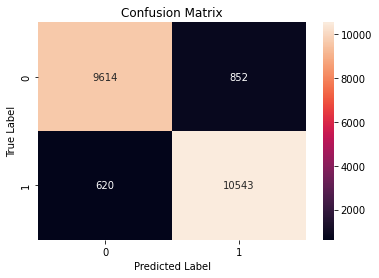

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(tfidf_train, Y_train)

y_pred = rf_model.predict(tfidf_test)

precision, recall, fscore, train_support = score(Y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(fscore,3), round(acs(Y_test,y_pred), 3)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#PIPELINE

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', LinearSVC())])
model_svc = pipe.fit(X_train, Y_train)
svc_pred = model_svc.predict(X_test)

print("Accuracy of Pipeline: {}%".format(round(accuracy_score(Y_test, svc_pred)*100,2)))
print("\nConfusion Matrix of pipeline:\n")
cm = confusion_matrix(Y_test, svc_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\nClassification Report of pipeline:\n")
print(classification_report(Y_test, svc_pred))

NameError: ignored